In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files


uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:

import io

data = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [ ]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.shape

(8523, 12)

In [ ]:
data.drop(['Item_Identifier','Outlet_Identifier'],axis=1, inplace=True)

In [ ]:

print("Item_Fat_Content #:",data['Item_Fat_Content'].nunique())
print("Item_Type #:",data['Item_Type'].nunique())
print("Outlet_Establishment_Year #:",data['Outlet_Establishment_Year'].nunique())
print("Outlet_Size #:",data['Outlet_Size'].nunique())
print("Outlet_Location_Type #:",data['Outlet_Location_Type'].nunique())
print("Outlet_Type #:",data['Outlet_Type'].nunique())



Item_Fat_Content #: 5
Item_Type #: 16
Outlet_Establishment_Year #: 9
Outlet_Size #: 3
Outlet_Location_Type #: 3
Outlet_Type #: 4


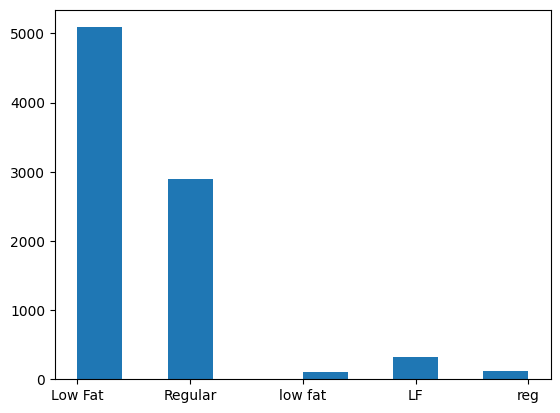

In [ ]:
plt.hist(data['Item_Fat_Content'])
plt.show()

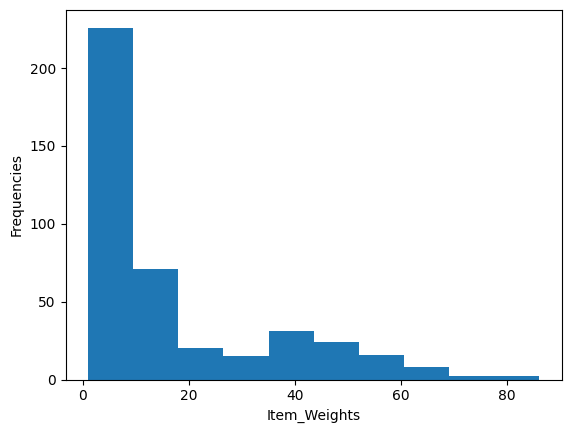

In [ ]:
plt.hist(data['Item_Weight'].value_counts())
plt.xlabel("Item_Weights")
plt.ylabel("Frequencies")
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Frequency'>

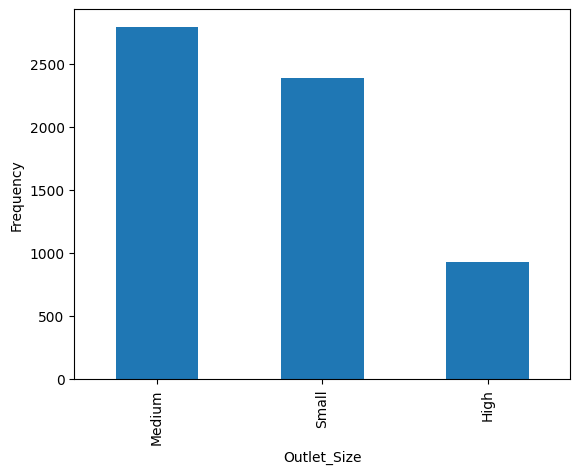

In [ ]:
data['Outlet_Size'].value_counts().plot(kind='bar',xlabel='Outlet_Size',ylabel='Frequency')

In [ ]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
data['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'Low Fat':'LowFat','Regular':'Regular','LF':'LowFat','reg':'Regular','low fat':'LowFat'})


In [ ]:
data['Item_Fat_Content'].value_counts()

LowFat     5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'LowFat':1,'Regular':0})

In [ ]:
data.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.647307,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.477836,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,1.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
data.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [ ]:
# getting mode based on outlet_type
OutletSize_mode = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x: x.mode())
OutletSize_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
# fill null values using the mode per oulet_type
missing_values = data['Outlet_Size'].isnull()
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: OutletSize_mode[x].Outlet_Size)


In [ ]:
#data['Outlet_Size'].fillna('Medium',inplace=True)

In [ ]:
print(data['Outlet_Size'].mode())

0    Small
Name: Outlet_Size, dtype: object


## ANOVA Tests

In [ ]:
import scipy.stats as stats

print(data['Outlet_Size'].unique())
print(data['Outlet_Type'].unique())
print(data['Outlet_Location_Type'].unique())
print(data['Item_Fat_Content'].unique())

['Medium' 'Small' 'High']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Tier 1' 'Tier 3' 'Tier 2']
[1 0]


In [ ]:
#ANOVA test for Outlet Size
stats.f_oneway(data['Item_Outlet_Sales'][data['Outlet_Size'] == 'Medium'],
               data['Item_Outlet_Sales'][data['Outlet_Size'] == 'Small'],
               data['Item_Outlet_Sales'][data['Outlet_Size'] == 'High'])

F_onewayResult(statistic=213.69096479853798, pvalue=2.8042418281729364e-91)

In [ ]:
#Since the p-value of this ANOVA test is 2.8042418281729364e-91 (less than 0.05);
#we can reject null hypothesis which states each group's('Medium' 'Small' 'High') mean is equal.
#This concludes we cannot eliminate this variable from our estimation of the Item_Outlet_Sales.

In [ ]:
#ANOVA test for Outlet Type
stats.f_oneway(data['Item_Outlet_Sales'][data['Outlet_Type'] == 'Grocery Store'],
               data['Item_Outlet_Sales'][data['Outlet_Type'] == 'Supermarket Type1'],
               data['Item_Outlet_Sales'][data['Outlet_Type'] == 'Supermarket Type2'],
               data['Item_Outlet_Sales'][data['Outlet_Type'] == 'Supermarket Type3'])

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

In [ ]:
#Since the p-value of this ANOVA test is zero (less than 0.05);
#we can reject null hypothesis which states each group's ('Supermarket Type1' 'Supermarket Type2' 'Grocery Store', 'Supermarket Type3') mean is equal.
#This concludes we cannot eliminate this variable from our estimation of the Item_Outlet_Sales.

In [ ]:
#ANOVA test for Outlet Location Type
stats.f_oneway(data['Item_Outlet_Sales'][data['Outlet_Location_Type'] == 'Tier 1'],
               data['Item_Outlet_Sales'][data['Outlet_Location_Type'] == 'Tier 2'],
               data['Item_Outlet_Sales'][data['Outlet_Location_Type'] == 'Tier 3'])

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

In [ ]:
#Since the p-value of this ANOVA test is 5.2228172988842975e-24 (less than 0.05);
#we can reject null hypothesis which states each group's ('Tier 1' 'Tier 3' 'Tier 2') mean is equal.
#This concludes we cannot eliminate this variable from our estimation of the Item_Outlet_Sales.

In [ ]:
#ANOVA test for Item_Fat_Content --- 1 means LowFat and 0 means Regular
stats.f_oneway(data['Item_Outlet_Sales'][data['Item_Fat_Content'] == 1],
               data['Item_Outlet_Sales'][data['Item_Fat_Content'] == 0])


F_onewayResult(statistic=2.98666429015733, pvalue=0.08398916967694944)

In [ ]:
#Since the p-value of this ANOVA test is 0.08398916967694944 (more than 0.05);
#we can accept null hypothesis which states each group's (1 or 'LowFat' , 0 or 'Regular') mean is equal.
#This concludes we can eliminate this variable from our estimation of the Item_Outlet_Sales.

## Mann-Whitney U Test

In [ ]:
#Mann-Whitney U Test
# create separate dataframes for low fat and regular item_fat_content categories
# data2=data.groupby(['Item_Fat_Content'])
# print(data2.head(7))
low_fat_sales = data[data['Item_Fat_Content']==1]['Item_Outlet_Sales']
regular_sales = data[data['Item_Fat_Content']==0]['Item_Outlet_Sales']


stat, p = stats.mannwhitneyu(low_fat_sales, regular_sales)

print('Mann-Whitney U test statistic:', stat)
print('p-value:', p)

alpha = 0.05
if p > alpha:
    print('Failed to reject null hypothesis. There is no significant difference in median sales between low fat and regular item_fat_content categories.')
else:
    print('Reject null hypothesis. There is a significant difference in median sales between low fat and regular item_fat_content categories.')


Mann-Whitney U test statistic: 8103818.0
p-value: 0.08286955791693564
Failed to reject null hypothesis. There is no significant difference in median sales between low fat and regular item_fat_content categories.


## Converting Categorical Variables

In [ ]:
dummyData=pd.get_dummies(data[['Item_Type']], prefix=['IType'], drop_first=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
ordinal_df=pd.DataFrame(enc.fit_transform(data[['Outlet_Size','Outlet_Location_Type', 'Outlet_Type']]))

In [ ]:
data.drop(['Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1,inplace=True)

In [ ]:
ordinal_df=ordinal_df.rename({0: 'Outlet_Size', 1: 'Outlet_Location_Type', 2:'Outlet_Type'},axis=1)

In [ ]:
df = pd.concat([data, dummyData, ordinal_df], axis=1)

In [ ]:
dummyData.shape

(8523, 15)

In [ ]:
ordinal_df.columns.values

array(['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], dtype=object)

In [ ]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,IType_Breads,IType_Breakfast,IType_Canned,IType_Dairy,...,IType_Household,IType_Meat,IType_Others,IType_Seafood,IType_Snack Foods,IType_Soft Drinks,IType_Starchy Foods,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,249.8092,1999,3735.1380,0,0,0,1,...,0,0,0,0,0,0,0,1.0,0.0,1.0
1,5.92,0,0.019278,48.2692,2009,443.4228,0,0,0,0,...,0,0,0,0,0,1,0,1.0,2.0,2.0
2,17.50,1,0.016760,141.6180,1999,2097.2700,0,0,0,0,...,0,1,0,0,0,0,0,1.0,0.0,1.0
3,19.20,0,0.000000,182.0950,1998,732.3800,0,0,0,0,...,0,0,0,0,0,0,0,2.0,2.0,0.0
4,8.93,1,0.000000,53.8614,1987,994.7052,0,0,0,0,...,1,0,0,0,0,0,0,0.0,2.0,1.0


In [ ]:
df.columns.values

array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'IType_Breads',
       'IType_Breakfast', 'IType_Canned', 'IType_Dairy',
       'IType_Frozen Foods', 'IType_Fruits and Vegetables',
       'IType_Hard Drinks', 'IType_Health and Hygiene', 'IType_Household',
       'IType_Meat', 'IType_Others', 'IType_Seafood', 'IType_Snack Foods',
       'IType_Soft Drinks', 'IType_Starchy Foods', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'], dtype=object)

In [ ]:
df.isnull().sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales              0
IType_Breads                   0
IType_Breakfast                0
IType_Canned                   0
IType_Dairy                    0
IType_Frozen Foods             0
IType_Fruits and Vegetables    0
IType_Hard Drinks              0
IType_Health and Hygiene       0
IType_Household                0
IType_Meat                     0
IType_Others                   0
IType_Seafood                  0
IType_Snack Foods              0
IType_Soft Drinks              0
IType_Starchy Foods            0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

## Visualizations

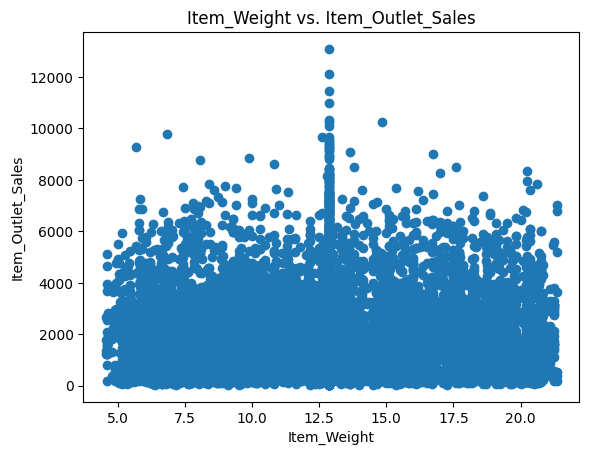

In [ ]:
plt.scatter(data['Item_Weight'],data['Item_Outlet_Sales'])
plt.title("Item_Weight vs. Item_Outlet_Sales")
plt.ylabel("Item_Outlet_Sales")
plt.xlabel("Item_Weight")
plt.show()


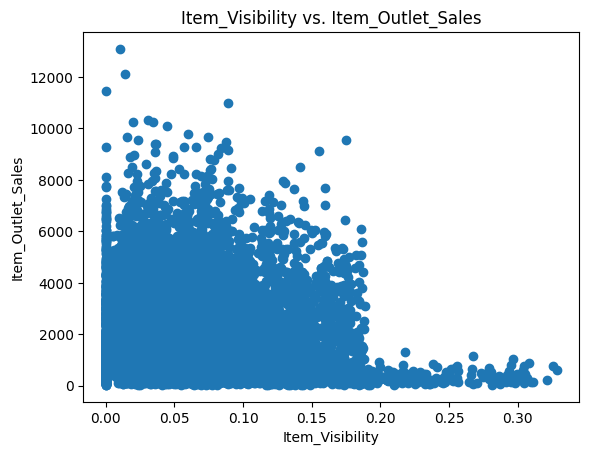

In [ ]:
plt.scatter(data['Item_Visibility'],data['Item_Outlet_Sales'])
plt.title("Item_Visibility vs. Item_Outlet_Sales")
plt.ylabel("Item_Outlet_Sales")
plt.xlabel("Item_Visibility")
plt.show()

## Fitting a model

In [ ]:
X= df.loc[:, df.columns != 'Item_Outlet_Sales']
y= df['Item_Outlet_Sales']

In [ ]:
from sklearn.utils.fixes import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
r_squared =[]
mae=[]
rmse=[]
labels = ['Linear Regression', 'Random Forest', 'Decision Tree', 'SVR', 'ANN']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

linear_r_squared = r2_score(y_test, y_pred)
r_squared.append(linear_r_squared)

linear_mae = mean_absolute_error(y_test, y_pred)
mae.append(linear_mae)

linear_rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse.append(linear_rmse)

print("R^2 value = ", linear_r_squared)
print("MAE = ",linear_mae)
print("RMSE = ",linear_rmse)

R^2 value =  0.5174269803412366
RMSE =  1145.2593690467509


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

rf_regressor.fit(X_train,y_train)

y_pred = rf_regressor.predict(X_test)

rf_r_squared = r2_score(y_test, y_pred)
r_squared.append(rf_r_squared)

rf_mae = mean_absolute_error(y_test, y_pred)
mae.append(rf_mae)

rf_rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse.append(rf_rmse)

print("R^2 value = ", r2_score(y_test, y_pred))
print("RMSE = ",mean_squared_error(y_test, y_pred, squared=False))
print("MAE = ",mean_absolute_error(y_test, y_pred))

R^2 value =  0.5168645481225291
RMSE =  1145.926566724199
MAE =  804.6019228152494


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state = 0)


dt_regressor.fit(X_train,y_train)

y_pred = dt_regressor.predict(X_test)

dt_r_squared = r2_score(y_test, y_pred)
r_squared.append(dt_r_squared)

dt_mae = mean_absolute_error(y_test, y_pred)
mae.append(dt_mae)

dt_rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse.append(dt_rmse)

print("R^2 value = ", r2_score(y_test, y_pred))

print("RMSE = ",mean_squared_error(y_test, y_pred, squared=False))

print("MAE = ",mean_absolute_error(y_test, y_pred))

R^2 value =  0.14600081208868398
RMSE =  1523.5301866579298
MAE =  1054.5537862756598


In [ ]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'sigmoid')

svr_regressor.fit(X_train,y_train)

y_pred = svr_regressor.predict(X_test)

svr_r_squared = r2_score(y_test, y_pred)
r_squared.append(svr_r_squared)

svr_mae = mean_absolute_error(y_test, y_pred)
mae.append(svr_mae)

svr_rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse.append(svr_rmse)

print("R^2 value = ", r2_score(y_test, y_pred))

print("RMSE = ",mean_squared_error(y_test, y_pred, squared=False))

print("MAE = ",mean_absolute_error(y_test, y_pred))

R^2 value =  0.09594511766544767
RMSE =  1567.5439734706063
MAE =  1178.7763640441387


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ann_model = Sequential()
ann_model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
ann_model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
ann_model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

ann_model.compile(optimizer='adam', loss='mean_squared_error')

ann_model.fit(X_train, y_train, batch_size=15, epochs=50)

y_pred = ann_model.predict(X_test)

score = ann_model.evaluate(X_test, y_test)
print('Test loss:', score)

ann_r2 = r2_score(y_test, y_pred)

r_squared.append(ann_r2)

ann_mae = mean_absolute_error(y_test, y_pred)
mae.append(ann_mae)

ann_rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse.append(ann_rmse)

print(f"R-squared: {ann_r2}")
print(f"RMSE: {ann_rmse}")
print("MAE = ",{ann_mae})


Epoch 1/50
455/455 [==============================] - 2s 2ms/step - loss: 7778421.5000
Epoch 2/50
455/455 [==============================] - 1s 2ms/step - loss: 7303669.0000
Epoch 3/50
455/455 [==============================] - 1s 2ms/step - loss: 5989181.5000
Epoch 4/50
455/455 [==============================] - 1s 2ms/step - loss: 4291337.0000
Epoch 5/50
455/455 [==============================] - 1s 3ms/step - loss: 2960703.5000
Epoch 6/50
455/455 [==============================] - 1s 3ms/step - loss: 2223205.5000
Epoch 7/50
455/455 [==============================] - 1s 2ms/step - loss: 1899072.1250
Epoch 8/50
455/455 [==============================] - 1s 2ms/step - loss: 1761161.5000
Epoch 9/50
455/455 [==============================] - 1s 2ms/step - loss: 1688441.0000
Epoch 10/50
455/455 [==============================] - 1s 2ms/step - loss: 1642853.0000
Epoch 11/50
455/455 [==============================] - 1s 2ms/step - loss: 1610651.6250
Epoch 12/50
455/455 [====================

In [ ]:
# Sort the data r_squared, rmse, mae
sorted_data = sorted(zip(r_squared, labels))
sorted_rmse, sorted_labels = zip(*sorted_data)

plt.bar(sorted_labels, sorted_rmse)

plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.xlabel('Regression Models')
plt.ylabel('RMSE')

plt.show()